In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('../..'))

if module_path not in sys.path:
    sys.path.append(module_path)

# MNIST

In [2]:
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder

X, y = fetch_openml('mnist_784', return_X_y=True)
y = y.astype(np.float32)

# normalizing the RGB codes by dividing it to the max RGB value
X = X / 255

# splitting into train and test data
X_train, y_train = X[:60000], y[:60000]
X_test, y_test = X[60000:], y[60000:]

# one-hot-encode the labels
y_train = OneHotEncoder(sparse=False).fit_transform(y_train.reshape(-1, 1))

## MultiLayer Perceptron

epoch	iter	 cost	
   0	 657	 4.3877e-01	avg_loss:  8.3753e-01 - val_loss:  4.0997e-01 - acc:  0.7656 - val_acc:  0.7762
   1	1314	 2.8073e-01	avg_loss:  3.3375e-01 - val_loss:  2.3155e-01 - acc:  0.9062 - val_acc:  0.8753
   2	1971	 2.4960e-01	avg_loss:  2.4940e-01 - val_loss:  1.8733e-01 - acc:  0.9062 - val_acc:  0.8947
   3	2628	 2.3549e-01	avg_loss:  2.2266e-01 - val_loss:  1.6703e-01 - acc:  0.9062 - val_acc:  0.9034
   4	3285	 2.2503e-01	avg_loss:  2.0825e-01 - val_loss:  1.5395e-01 - acc:  0.9219 - val_acc:  0.9112
   5	3942	 2.1611e-01	avg_loss:  1.9818e-01 - val_loss:  1.4406e-01 - acc:  0.9219 - val_acc:  0.9161
   6	4599	 2.0828e-01	avg_loss:  1.9025e-01 - val_loss:  1.3596e-01 - acc:  0.9219 - val_acc:  0.9209
   7	5256	 2.0136e-01	avg_loss:  1.8363e-01 - val_loss:  1.2902e-01 - acc:  0.9219 - val_acc:  0.9244
   8	5913	 1.9525e-01	avg_loss:  1.7789e-01 - val_loss:  1.2292e-01 - acc:  0.9219 - val_acc:  0.9279
   9	6570	 1.8983e-01	avg_loss:  1.7282e-01 - val_loss:  1.1747e

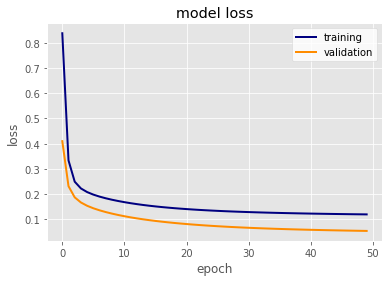

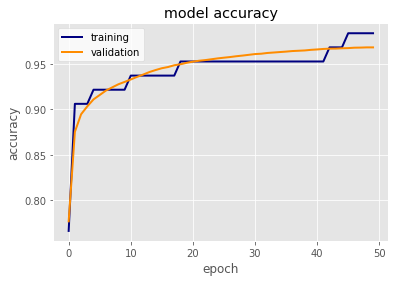

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       980
         1.0       0.98      0.99      0.98      1135
         2.0       0.97      0.97      0.97      1032
         3.0       0.97      0.98      0.97      1010
         4.0       0.96      0.98      0.97       982
         5.0       0.96      0.97      0.97       892
         6.0       0.97      0.97      0.97       958
         7.0       0.97      0.96      0.97      1028
         8.0       0.97      0.97      0.97       974
         9.0       0.98      0.93      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [30]:
from optiml.ml.neural_network.activations import sigmoid, softmax
from optiml.ml.neural_network.layers import FullyConnected
from optiml.ml.neural_network.losses import categorical_cross_entropy
from optiml.ml.neural_network.regularizers import L2
from optiml.ml.neural_network import NeuralNetworkClassifier
from optiml.ml.utils import plot_model_accuracy, plot_model_loss

from optiml.opti.unconstrained.stochastic import StochasticGradientDescent

from sklearn.metrics import classification_report

net = NeuralNetworkClassifier(
    (FullyConnected(784, 100, activation=sigmoid, coef_reg=L2(0.01), inter_reg=L2(0.1)),
     FullyConnected(100, 100, activation=sigmoid, coef_reg=L2(0.01), inter_reg=L2(0.1)),
     FullyConnected(100, 10, activation=softmax, coef_reg=L2(0.01), inter_reg=L2(0.1))),
    loss=categorical_cross_entropy, optimizer=StochasticGradientDescent, learning_rate_init=0.01, 
    early_stopping=True, validation_split=0.3, max_iter=50, momentum_type='nesterov', momentum=0.9, 
    batch_size=64, verbose=True)
%time net.fit(X_train, y_train)
plot_model_loss(net.train_loss_history, net.val_loss_history)
plot_model_accuracy(net.train_score_history, net.val_score_history)
print(classification_report(y_test, net.predict(X_test)))

## Convolutional Neural Network

In [31]:
# reshaping the images data to a tensor of shape
# (n_samples, image_height, image_width, n_channels)
# for convolution layers
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

epoch	iter	 cost	
   0	 657	 4.2534e-02	avg_loss:  1.4045e-01 - val_loss:  5.2732e-02 - acc:  0.9688 - val_acc:  0.9678
   1	1314	 2.1367e-02	avg_loss:  4.5415e-02 - val_loss:  3.7619e-02 - acc:  1.0000 - val_acc:  0.9770
   2	1971	 1.6961e-02	avg_loss:  3.6532e-02 - val_loss:  3.1876e-02 - acc:  1.0000 - val_acc:  0.9811
   3	2628	 1.5816e-02	avg_loss:  3.1748e-02 - val_loss:  2.9019e-02 - acc:  1.0000 - val_acc:  0.9828
   4	3285	 1.5128e-02	avg_loss:  2.8556e-02 - val_loss:  2.7622e-02 - acc:  1.0000 - val_acc:  0.9837

CPU times: user 1h 54min 43s, sys: 1h 41min 52s, total: 3h 36min 36s
Wall time: 31min 1s


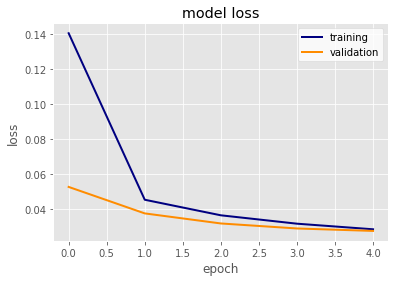

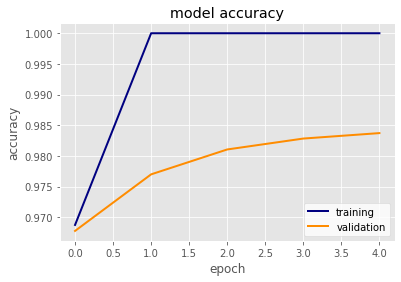

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       980
         1.0       0.99      0.99      0.99      1135
         2.0       0.99      0.98      0.98      1032
         3.0       0.97      0.99      0.98      1010
         4.0       0.99      0.99      0.99       982
         5.0       0.98      0.99      0.98       892
         6.0       0.99      0.98      0.99       958
         7.0       0.99      0.98      0.99      1028
         8.0       0.98      0.98      0.98       974
         9.0       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [35]:
from optiml.ml.neural_network.activations import relu, softmax
from optiml.ml.neural_network.layers import Conv2D, MaxPool2D, Flatten, FullyConnected
from optiml.ml.neural_network.losses import categorical_cross_entropy
from optiml.ml.neural_network import NeuralNetworkClassifier
from optiml.ml.utils import plot_model_accuracy, plot_model_loss

from optiml.opti.unconstrained.stochastic import StochasticGradientDescent

from sklearn.metrics import classification_report

cnn = NeuralNetworkClassifier(
    (Conv2D(in_channels=1, out_channels=6, kernel_size=(5, 5), strides=(1, 1), padding='same', 
            channels_last=True, activation=relu, coef_reg=L2(0.01), inter_reg=L2(0.1)),  # (n_samples, 28, 28, 6)
     MaxPool2D(pool_size=(2, 2), strides=(2, 2)),  # (n_samples, 14, 14, 6)
     Conv2D(in_channels=6, out_channels=16, kernel_size=(5, 5), strides=(1, 1), padding='same', 
            channels_last=True, activation=relu, coef_reg=L2(0.01), inter_reg=L2(0.1)),  # (n_samples, 14, 14, 16)
     MaxPool2D(pool_size=(2, 2), strides=(2, 2)),  # (n_samples, 7, 7, 16)
     Flatten(),  # (n_samples, 7 * 7 * 16)
     FullyConnected(n_in=7 * 7 * 16, n_out=10, activation=softmax, coef_reg=L2(0.01), inter_reg=L2(0.1))),
    loss=categorical_cross_entropy, optimizer=StochasticGradientDescent, learning_rate_init=0.01, 
    early_stopping=True, validation_split=0.3, max_iter=5, momentum_type='nesterov', momentum=0.9, 
    batch_size=64, verbose=True)
%time cnn.fit(X_train, y_train)
plot_model_loss(cnn.train_loss_history, cnn.val_loss_history)
plot_model_accuracy(cnn.train_score_history, cnn.val_score_history)
print(classification_report(y_test, cnn.predict(X_test)))